In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly

In [ ]:
from google.colab import files

import io
url = r'https://raw.githubusercontent.com/KallistaT/HHA-506/main/asthma-hospitalization-rates-by-county-2015_2018%20(1).csv'
df = pd.read_csv(url, encoding ='latin1')

Describing the variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2832 entries, 0 to 2831
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   COUNTY                             2832 non-null   object 
 1   YEAR                               2832 non-null   int64  
 2   STRATA                             2832 non-null   object 
 3   STRATA NAME                        2832 non-null   object 
 4   AGE GROUP                          2832 non-null   object 
 5   NUMBER OF HOSPITALIZATIONS         2037 non-null   object 
 6   AGE-ADJUSTED HOSPITALIZATION RATE  1985 non-null   float64
 7   COMMENT                            847 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 177.1+ KB


**Potential DV**

*   Number of hospitalizations
*   Age-adjusted hospitalization rate

**Potential IV**


*   Age group
*   Race/ethnicity
*  County 
*  Year





In [ ]:
list(df)

['COUNTY',
 'YEAR',
 'STRATA',
 'STRATA NAME',
 'AGE GROUP',
 'NUMBER OF HOSPITALIZATIONS',
 'AGE-ADJUSTED HOSPITALIZATION RATE',
 'COMMENT']

Value counts

In [ ]:
df['COUNTY'].value_counts()

California         48
Shasta             48
Inyo               48
Monterey           48
Mariposa           48
Trinity            48
Fresno             48
Placer             48
Orange             48
Stanislaus         48
Siskiyou           48
Sierra             48
Sacramento         48
Mono               48
Merced             48
Santa Cruz         48
El Dorado          48
Kern               48
Tehama             48
Colusa             48
San Francisco      48
Del Norte          48
Butte              48
Santa Barbara      48
Alpine             48
San Joaquin        48
Lake               48
Kings              48
Contra Costa       48
San Mateo          48
Riverside          48
San Luis Obispo    48
Marin              48
Amador             48
San Benito         48
Imperial           48
Mendocino          48
Sonoma             48
Modoc              48
San Diego          48
Ventura            48
Glenn              48
Lassen             48
Yolo               48
Napa               48
Sutter    

In [ ]:
df['YEAR'].value_counts()

2015    507
2017    502
2016    493
2018    483
Name: YEAR, dtype: int64

In [ ]:
df['AGE GROUP'].value_counts()

All ages       988
18+ years      186
18-64 years    180
0-17 years     173
0-4 years      158
65+ years      151
5-17 years     149
Name: AGE GROUP, dtype: int64

In [ ]:
df['STRATA'].value_counts()

Race/ethnicity      794
Age groups          638
Child vs. adult     359
Total population    194
Name: STRATA, dtype: int64

In [ ]:
df['STRATA NAME'].value_counts()

All ages       194
18+ years      186
White          182
18-64 years    180
0-17 years     173
Hispanic       163
0-4 years      158
AI/AN          153
Black          151
65+ years      151
5-17 years     149
Asian/PI       145
Name: STRATA NAME, dtype: int64

Missing Values and Data Cleaning

In [ ]:
df = df.dropna(subset=['NUMBER OF HOSPITALIZATIONS','AGE-ADJUSTED HOSPITALIZATION RATE'], axis=0, how='any')
# df = df.dropna(axis=0, how='all')
df.drop(columns=['COMMENT'], axis=1)
df['STRATA NAME'] = df['STRATA NAME'].str.replace('','-')
df['AGE GROUP'] = df['AGE GROUP'].str.replace('','-')
df['NUMBER OF HOSPITALIZATIONS'] = df['NUMBER OF HOSPITALIZATIONS'].str.replace(',','')
df['NUMBER OF HOSPITALIZATIONS'] = df['NUMBER OF HOSPITALIZATIONS'].astype('int64', copy=False)

In [ ]:
df[df['STRATA'] == 'Age groups']

,COUNTY,YEAR,STRATA,STRATA NAME,AGE GROUP,NUMBER OF HOSPITALIZATIONS,AGE-ADJUSTED HOSPITALIZATION RATE,COMMENT
177,California,2015,Age groups,0-4 years,0-4 years,4748,18.3,NaN
178,Alameda,2015,Age groups,0-4 years,0-4 years,336,33.4,NaN
179,Alpine,2015,Age groups,0-4 years,0-4 years,0,0.0,NaN
181,Butte,2015,Age groups,0-4 years,0-4 years,27,24.0,NaN
184,Contra Costa,2015,Age groups,0-4 years,0-4 years,161,25.5,NaN
...,...,...,...,...,...,...,...,...
2528,Stanislaus,2018,Age groups,65+ years,65+ years,32,4.3,NaN
2531,Trinity,2018,Age groups,65+ years,65+ years,0,0.0,NaN
2532,Tulare,2018,Age groups,65+ years,65+ years,15,2.6,NaN
2534,Ventura,2018,Age groups,65+ years,65+ years,64,4.8,NaN


Transformations

In [ ]:
#For simplicity's sake I left out overlapping age groups so some counties will be omitted 

granular_age_groups = ['0-4 years', '5-17 years', '18-64 years', '65+ years']
df_temp = df[df['AGE GROUP'].isin(granular_age_groups)]
df_temp = df_temp.drop(columns=['YEAR', 'AGE-ADJUSTED HOSPITALIZATION RATE'])
df_age_group = df_temp.groupby('AGE GROUP', as_index=False).sum()
def age_group_sorter(col):
  """Sort age groups in ascending order"""
  corr = {age_group: order for order, age_group in enumerate(granular_age_groups)}
  return col.map(corr)
df_age_group.sort_values(by='AGE GROUP', key=age_group_sorter)

,AGE GROUP,NUMBER OF HOSPITALIZATIONS
0,0-4 years,33152
2,5-17 years,34589
1,18-64 years,62560
3,65+ years,29014


Distribution - Right Skewed

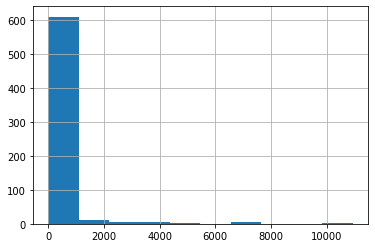

In [ ]:
df_temp['NUMBER OF HOSPITALIZATIONS'].hist()

In [ ]:
df_temp[['AGE GROUP','NUMBER OF HOSPITALIZATIONS']].describe()

,NUMBER OF HOSPITALIZATIONS
count,638.000000
mean,249.710031
std,886.007872
min,0.000000
25%,18.000000
50%,41.000000
75%,136.500000
max,10939.000000


In [ ]:
df_temp['NUMBER OF HOSPITALIZATIONS'].mean(numeric_only=None)

249.71003134796237

In [ ]:
df_temp['NUMBER OF HOSPITALIZATIONS'].median(numeric_only=None)

41.0

In [ ]:
df_temp['NUMBER OF HOSPITALIZATIONS'].mode(dropna=False)

0    0
dtype: int64

In [ ]:
!pip install matplotlib==3.1.3

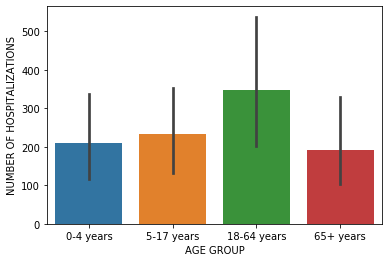

In [ ]:
sns.barplot(data=df_temp, x = 'AGE GROUP', y = 'NUMBER OF HOSPITALIZATIONS')

In [ ]:
import plotly.express as px

Asthma hospitalizations in California by age group, 2015 -2018

In [ ]:
fig = px.bar(df_temp, x='AGE GROUP', y='NUMBER OF HOSPITALIZATIONS', template="plotly_dark", color='AGE GROUP')
fig.show()

In [ ]:
df2 = df[df['STRATA'] == 'Race/ethnicity']
df2 = df2.drop(columns=['YEAR', 'AGE-ADJUSTED HOSPITALIZATION RATE'])
df3 = df2.groupby('STRATA NAME', as_index=False).sum()
df3.rename(columns={'STRATA NAME':'Race/ethnicity'}, inplace=True)
df3

,Race/ethnicity,NUMBER OF HOSPITALIZATIONS
0,AI/AN,222
1,Asian/PI,14510
2,Black,29127
3,Hispanic,59276
4,White,47603


In [ ]:
df3[['Race/ethnicity','NUMBER OF HOSPITALIZATIONS']].describe()

,NUMBER OF HOSPITALIZATIONS
count,5.000000
mean,30147.600000
std,23949.281666
min,222.000000
25%,14510.000000
50%,29127.000000
75%,47603.000000
max,59276.000000


In [ ]:
df3['NUMBER OF HOSPITALIZATIONS'].mean(numeric_only=None)

30147.6

In [ ]:
df3['NUMBER OF HOSPITALIZATIONS'].median(numeric_only=None)

29127.0

In [ ]:
df3['NUMBER OF HOSPITALIZATIONS'].mode(dropna=False)

0      222
1    14510
2    29127
3    47603
4    59276
dtype: int64

Asthma hospitalizations in California by race/ethnicity, 2015 -2018

In [ ]:
fig = px.bar(df3, x='Race/ethnicity', y='NUMBER OF HOSPITALIZATIONS', template="plotly_white", color='Race/ethnicity')
fig.show()